# Importing Libraries  

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
!pip install modAL
import modAL
from modAL.models import ActiveLearner
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import numpy as np
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score ,classification_report
from modAL.models import ActiveLearner
from sklearn import metrics
from modAL.uncertainty import uncertainty_sampling,margin_sampling,entropy_sampling
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Reading dataset

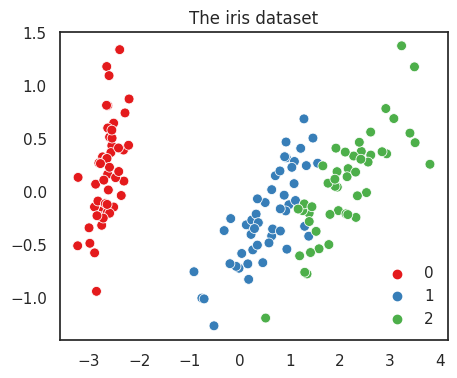

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the iris dataset and apply PCA
iris = load_iris()
pca = PCA(n_components=2).fit_transform(iris['data'])

# Plot the scatter plot of the first two principal components
sns.set(style='white')
plt.subplots(figsize=(5, 4))
sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=iris['target'], palette='Set1', s=50)
plt.title('The iris dataset')
plt.show()


In [31]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

# Splitting data 

In [32]:

# Split the dataset into a training set and a test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.80, random_state=42)

In [33]:
X_train.shape

(30, 4)

# Uncertainty sampling 

In [34]:
# Train an initial machine learning model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Set up the active learning model using Uncertainty Sampling
learner = ActiveLearner(
    estimator=LogisticRegression(max_iter=1000),
    query_strategy=uncertainty_sampling,
    X_training=X_train, y_training=y_train
)

# Select the most informative data points for labeling
n_queries = 100
for i in range(n_queries):
    query_idx, query_instance = learner.query(X_test)
    y_new = y_test[query_idx]
    learner.teach(query_instance, y_new)
    print("iteration number: ",i," accurcy is ", metrics.accuracy_score(learner.predict(X_test), y_test)*100)


# Evaluate the performance of the final model on the test set
y_pred = learner.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('Accuracy: %.2f%%' % (accuracy * 100))

iteration number:  0  accurcy is  96.66666666666667
iteration number:  1  accurcy is  97.5
iteration number:  2  accurcy is  97.5
iteration number:  3  accurcy is  97.5
iteration number:  4  accurcy is  98.33333333333333
iteration number:  5  accurcy is  97.5
iteration number:  6  accurcy is  98.33333333333333
iteration number:  7  accurcy is  98.33333333333333
iteration number:  8  accurcy is  98.33333333333333
iteration number:  9  accurcy is  98.33333333333333
iteration number:  10  accurcy is  98.33333333333333
iteration number:  11  accurcy is  98.33333333333333
iteration number:  12  accurcy is  98.33333333333333
iteration number:  13  accurcy is  98.33333333333333
iteration number:  14  accurcy is  98.33333333333333
iteration number:  15  accurcy is  98.33333333333333
iteration number:  16  accurcy is  98.33333333333333
iteration number:  17  accurcy is  98.33333333333333
iteration number:  18  accurcy is  98.33333333333333
iteration number:  19  accurcy is  98.33333333333333
it

Testing accuracy   : 98.33333333333333 %
MSE [TEST]          : 0.016666666666666666
Training accuracy  : 100.0 %
MSE [TRAIN]         : 0.0
precision :  0.9833333333333333
recall    :  0.9833333333333333
f1_score  :  0.9833333333333333


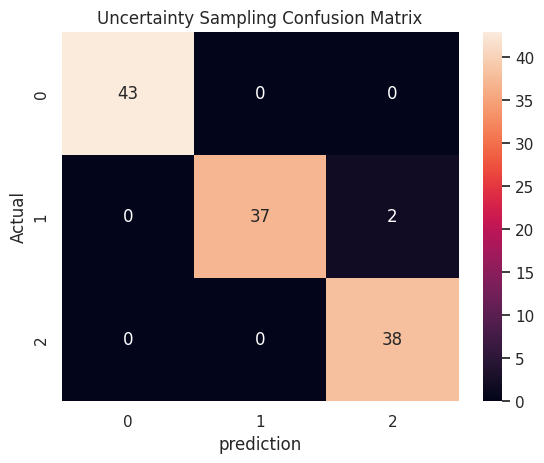

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      0.95      0.97        39
           2       0.95      1.00      0.97        38

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [35]:
get_accuracy('Uncertainty Sampling',learner,  X_train, y_train, X_test, y_test )

# Margin sampling

In [36]:
# Train an initial machine learning model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Set up the active learning model using margin_sampling
learner = ActiveLearner(
    estimator=LogisticRegression(max_iter=1000),
    query_strategy=margin_sampling,
    X_training=X_train, y_training=y_train
)

# Select the most informative data points for labeling
n_queries = 100
for i in range(n_queries):
    query_idx, query_instance = learner.query(X_test)
    y_new = y_test[query_idx]
    learner.teach(query_instance, y_new)
    print("iteration number: ",i," accurcy is ", metrics.accuracy_score(learner.predict(X_test), y_test)*100)

# Evaluate the performance of the final model on the test set
y_pred = learner.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('Accuracy: %.2f%%' % (accuracy * 100))

iteration number:  0  accurcy is  96.66666666666667
iteration number:  1  accurcy is  97.5
iteration number:  2  accurcy is  97.5
iteration number:  3  accurcy is  97.5
iteration number:  4  accurcy is  98.33333333333333
iteration number:  5  accurcy is  97.5
iteration number:  6  accurcy is  98.33333333333333
iteration number:  7  accurcy is  98.33333333333333
iteration number:  8  accurcy is  98.33333333333333
iteration number:  9  accurcy is  98.33333333333333
iteration number:  10  accurcy is  98.33333333333333
iteration number:  11  accurcy is  98.33333333333333
iteration number:  12  accurcy is  98.33333333333333
iteration number:  13  accurcy is  98.33333333333333
iteration number:  14  accurcy is  98.33333333333333
iteration number:  15  accurcy is  98.33333333333333
iteration number:  16  accurcy is  98.33333333333333
iteration number:  17  accurcy is  98.33333333333333
iteration number:  18  accurcy is  98.33333333333333
iteration number:  19  accurcy is  98.33333333333333
it

Testing accuracy   : 98.33333333333333 %
MSE [TEST]          : 0.016666666666666666
Training accuracy  : 100.0 %
MSE [TRAIN]         : 0.0
precision :  0.9833333333333333
recall    :  0.9833333333333333
f1_score  :  0.9833333333333333


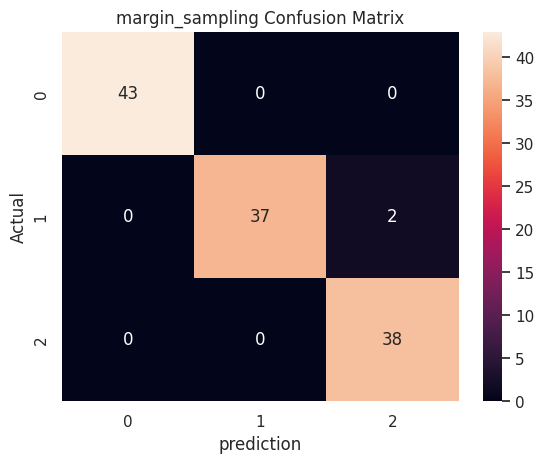

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      0.95      0.97        39
           2       0.95      1.00      0.97        38

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [37]:
get_accuracy('margin_sampling',learner,  X_train, y_train, X_test, y_test )

# Entropy  sampling

In [38]:
# Train an initial machine learning model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Set up the active learning model using entropy_sampling
learner = ActiveLearner(
    estimator=LogisticRegression(max_iter=1000),
    query_strategy=entropy_sampling,
    X_training=X_train, y_training=y_train
)

# Select the most informative data points for labeling
n_queries = 100
for i in range(n_queries):
    query_idx, query_instance = learner.query(X_test)
    y_new = y_test[query_idx]
    learner.teach(query_instance, y_new)
    print("iteration number: ",i," accurcy is ", metrics.accuracy_score(learner.predict(X_test), y_test)*100)

# Evaluate the performance of the final model on the test set
y_pred = learner.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('Accuracy: %.2f%%' % (accuracy * 100))

iteration number:  0  accurcy is  96.66666666666667
iteration number:  1  accurcy is  96.66666666666667
iteration number:  2  accurcy is  95.0
iteration number:  3  accurcy is  95.0
iteration number:  4  accurcy is  94.16666666666667
iteration number:  5  accurcy is  97.5
iteration number:  6  accurcy is  95.83333333333334
iteration number:  7  accurcy is  96.66666666666667
iteration number:  8  accurcy is  96.66666666666667
iteration number:  9  accurcy is  96.66666666666667
iteration number:  10  accurcy is  97.5
iteration number:  11  accurcy is  96.66666666666667
iteration number:  12  accurcy is  96.66666666666667
iteration number:  13  accurcy is  96.66666666666667
iteration number:  14  accurcy is  96.66666666666667
iteration number:  15  accurcy is  96.66666666666667
iteration number:  16  accurcy is  96.66666666666667
iteration number:  17  accurcy is  97.5
iteration number:  18  accurcy is  96.66666666666667
iteration number:  19  accurcy is  97.5
iteration number:  20  accur

Testing accuracy   : 97.5 %
MSE [TEST]          : 0.025
Training accuracy  : 96.66666666666667 %
MSE [TRAIN]         : 0.03333333333333333
precision :  0.975
recall    :  0.975
f1_score  :  0.975


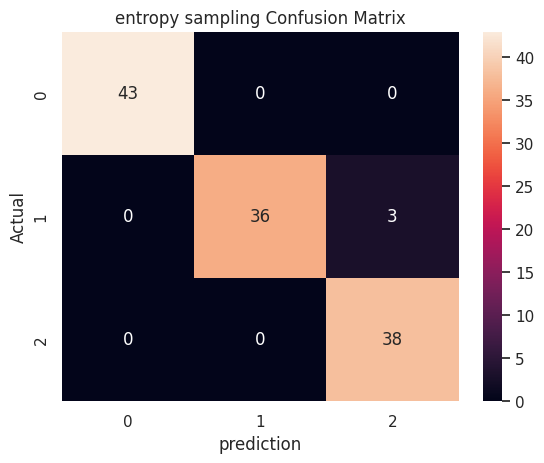

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      0.92      0.96        39
           2       0.93      1.00      0.96        38

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [39]:
get_accuracy('entropy sampling',learner,  X_train, y_train, X_test, y_test )

# Random Sampling 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=120/iris.data.shape[0], random_state=27)

Testing accuracy   : 93.33333333333333 %
MSE [TEST]          : 0.06666666666666667
Training accuracy  : 98.33333333333333 %
MSE [TRAIN]         : 0.016666666666666666
precision :  0.9333333333333333
recall    :  0.9333333333333333
f1_score  :  0.9333333333333333


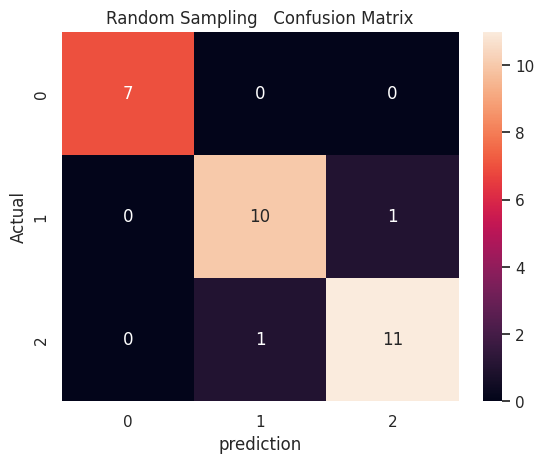

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      0.95      0.97        39
           2       0.95      1.00      0.97        38

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.91      0.91        11
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [41]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
get_accuracy('Random Sampling  ',model,  X_train, y_train, X_test, y_test )


# Plotting Final Prediction

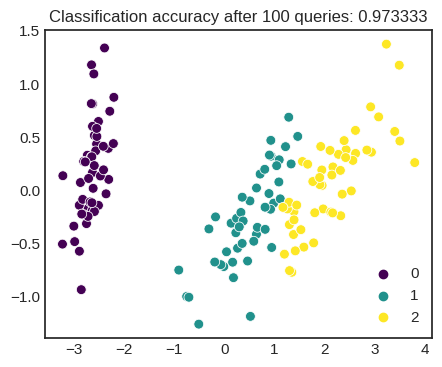

In [42]:
import seaborn as sns
plt.style.use('seaborn-white')
plt.figure(figsize=(5, 4))
prediction = learner.predict(iris['data'])
sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=prediction, palette='viridis', s=50)
plt.title('Classification accuracy after %i queries: %f' % (n_queries, learner.score(iris['data'], iris['target'])))
plt.show()